# Project: TMDB movie data analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>
> In this project we will be analyzing the TMDB movie data that is associated with various movies, their popularity, the director, the budget, cast and revenue generated. Comprehensively, we will be looking at the properties associated with the most popular movies inorder to establish what makes a movie performant interms of revenue generated and popularity. 
>
>We shall also try to corelate how the various variables like budget and director affect the revenue generated and popularity

In [4]:
#first, let's load the necessary libraries to aid in analysis and visualisation
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> Before we can analyze the tmdb dataset, it is important that we clean it and trim off any columns that will not be used in our data analysis and visualization.
### General Properties

In [5]:
df = pd.read_csv('tmdb-movies.csv', )
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Now let us see how large how our data set is.

In [6]:
df.shape

(10866, 21)

Our initial dataset has 10,866 rows and 21 columns

### A general statitsitical summary of our dataset can be seen below;

In [7]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

> From the ouput above, we notice that **'imdb_id'**, **'cast'**, **'homepage'**, **'director'**, **'tagline'**, **'keywords'**, **'overview'**, **'genres'** and **'production_companies'** columns have missing values. 

### Data Cleaning
Now, let us drop some of the columns that we will not using in our data analysis process as well as those with missing values.

> In  the **'budget_adj'** and **'revenue_adj'** columns, it can be observed that the data formatting is in scientific notation. However, that might be disturbing to understand so let us surpass that.

In [9]:
pd.set_option('display.float_format', lambda x:'%.3f' % x)
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.986,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.500,2015,137999939.280,1392445892.524
1,76341,tt1392190,28.420,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.100,2015,137999939.280,348161292.489
2,262500,tt2908446,13.113,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.300,2015,101199955.472,271619025.408
3,140607,tt2488496,11.173,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.500,2015,183999919.040,1902723129.802
4,168259,tt2820852,9.335,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.300,2015,174799923.088,1385748801.471


> We shall not be using the imdb_id, homepage, tagline, keywords and overview columns, so let us drop them.

In [10]:
df.drop(['imdb_id','id','homepage','keywords','tagline','overview' ], axis = 1, inplace = True)

In [11]:
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.986,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.500,2015,137999939.280,1392445892.524
1,28.420,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.100,2015,137999939.280,348161292.489
2,13.113,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.300,2015,101199955.472,271619025.408
3,11.173,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.500,2015,183999919.040,1902723129.802
4,9.335,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.300,2015,174799923.088,1385748801.471


In [12]:
df.shape

(10866, 15)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10866 non-null  float64
 1   budget                10866 non-null  int64  
 2   revenue               10866 non-null  int64  
 3   original_title        10866 non-null  object 
 4   cast                  10790 non-null  object 
 5   director              10822 non-null  object 
 6   runtime               10866 non-null  int64  
 7   genres                10843 non-null  object 
 8   production_companies  9836 non-null   object 
 9   release_date          10866 non-null  object 
 10  vote_count            10866 non-null  int64  
 11  vote_average          10866 non-null  float64
 12  release_year          10866 non-null  int64  
 13  budget_adj            10866 non-null  float64
 14  revenue_adj           10866 non-null  float64
dtypes: float64(4), int6

> Now let's visualize how our data looks so far.

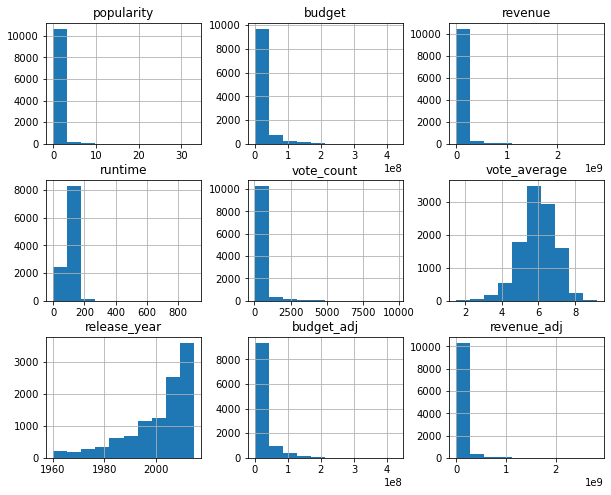

In [14]:
df.hist(figsize=(10,8));

<a id='eda'></a>
## Exploratory Data Analysis

> Now that we have done cleaning of the data, let us try to realize the properties exhibited by the movies that have picked up the highest popularity overtime.

### Exploring the movies that have picked up the highest popularity overtime

> Because we will be dealing with the movie titles in this analysis, let us set the original title column as the index column.

In [15]:
df.set_index('original_title', drop=True, append=False, inplace=True, verify_integrity=False)

In [16]:
df.head(10)

,popularity,budget,revenue,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
original_title,,,,,,,,,,,,,,
Jurassic World,32.986,150000000,1513528810,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.500,2015,137999939.280,1392445892.524
Mad Max: Fury Road,28.420,150000000,378436354,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.100,2015,137999939.280,348161292.489
Insurgent,13.113,110000000,295238201,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.300,2015,101199955.472,271619025.408
Star Wars: The Force Awakens,11.173,200000000,2068178225,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.500,2015,183999919.040,1902723129.802
Furious 7,9.335,190000000,1506249360,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.300,2015,174799923.088,1385748801.471
The Revenant,9.111,135000000,532950503,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.200,2015,124199945.352,490314247.022
Terminator Genisys,8.654,155000000,440603537,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.800,2015,142599937.256,405355075.684
The Martian,7.667,108000000,595380321,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.600,2015,99359956.282,547749654.310
Minions,7.404,74000000,1156730962,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.500,2015,68079970.045,1064192016.796


In [17]:
top_10=df.head(10)

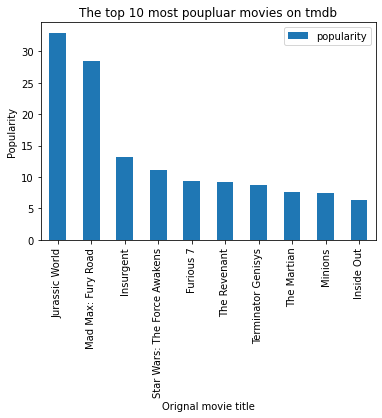

In [18]:
top_10.plot.bar( y='popularity')
plt.title('The top 10 most poupluar movies on tmdb')
plt.xlabel('Orignal movie title')
plt.ylabel('Popularity');

> From the output above, we can see that jurassic world has the highest popularity

### Looking at the genres the top 10 movies are categorized under

In [19]:
top_10.iloc[0:9,7]

original_title
Jurassic World                  Universal Studios|Amblin Entertainment|Legenda...
Mad Max: Fury Road              Village Roadshow Pictures|Kennedy Miller Produ...
Insurgent                       Summit Entertainment|Mandeville Films|Red Wago...
Star Wars: The Force Awakens            Lucasfilm|Truenorth Productions|Bad Robot
Furious 7                       Universal Pictures|Original Film|Media Rights ...
The Revenant                    Regency Enterprises|Appian Way|CatchPlay|Anony...
Terminator Genisys                        Paramount Pictures|Skydance Productions
The Martian                     Twentieth Century Fox Film Corporation|Scott F...
Minions                             Universal Pictures|Illumination Entertainment
Name: production_companies, dtype: object

### Establishing a relationship between budget spent on movie production and the revenue generated by the movie: top 10 most popular movies

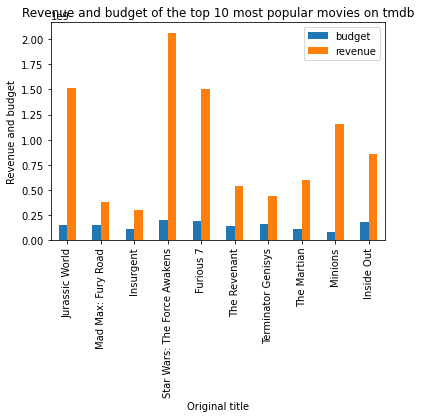

In [30]:
top_10.plot(y=['budget','revenue'], kind='bar')
plt.title('Revenue and budget of the top 10 most popular movies on tmdb')
plt.ylabel('Revenue and budget');
plt.xlabel('Original title');

### Establishing a relationship between budget spent on movie production and the revenue generated by the movie: top 10 least popular movies

In [21]:
bottom_10=df.tail(10)

In [22]:
bottom_10

,popularity,budget,revenue,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
original_title,,,,,,,,,,,,,,
The Ugly Dachshund,0.141,0,0,Dean Jones|Suzanne Pleshette|Charles Ruggles|K...,Norman Tokar,93,Comedy|Drama|Family,Walt Disney Pictures,2/16/66,14,5.700,1966,0.000,0.000
Nevada Smith,0.131,0,0,Steve McQueen|Karl Malden|Brian Keith|Arthur K...,Henry Hathaway,128,Action|Western,Paramount Pictures|Solar Productions|Embassy P...,6/10/66,10,5.900,1966,0.000,0.000
"The Russians Are Coming, The Russians Are Coming",0.318,0,0,Carl Reiner|Eva Marie Saint|Alan Arkin|Brian K...,Norman Jewison,126,Comedy|War,The Mirisch Corporation,5/25/66,11,5.500,1966,0.000,0.000
Seconds,0.089,0,0,Rock Hudson|Salome Jens|John Randolph|Will Gee...,John Frankenheimer,100,Mystery|Science Fiction|Thriller|Drama,Gibraltar Productions|Joel Productions|John Fr...,10/5/66,22,6.600,1966,0.000,0.000
Carry On Screaming!,0.087,0,0,Kenneth Williams|Jim Dale|Harry H. Corbett|Joa...,Gerald Thomas,87,Comedy,Peter Rogers Productions|Anglo-Amalgamated Fil...,5/20/66,13,7.000,1966,0.000,0.000
The Endless Summer,0.081,0,0,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,95,Documentary,Bruce Brown Films,6/15/66,11,7.400,1966,0.000,0.000
Grand Prix,0.066,0,0,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.700,1966,0.000,0.000
Beregis Avtomobilya,0.065,0,0,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.500,1966,0.000,0.000
"What's Up, Tiger Lily?",0.064,0,0,Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.400,1966,0.000,0.000


> Let us look as their popularity levels

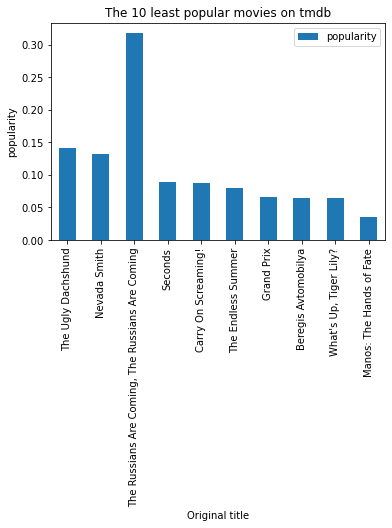

In [28]:
bottom_10.plot.bar( y='popularity')
plt.title('The 10 least popular movies on tmdb')
plt.xlabel('Original title')
plt.ylabel('popularity');

We can observe that **'Manos: the hands of fate'** is the least popular movie on tmdb

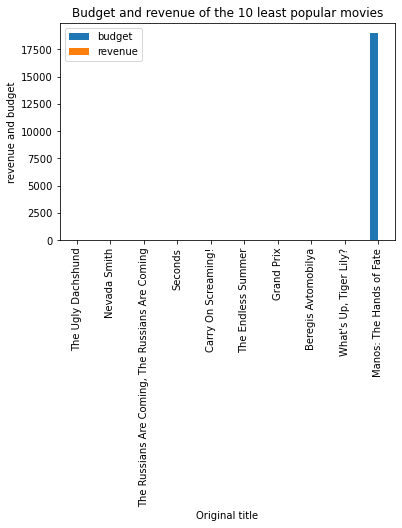

In [29]:
bottom_10.plot(y=['budget','revenue'], kind='bar')
plt.title('Budget and revenue of the 10 least popular movies')
plt.xlabel('Original title')
plt.ylabel('revenue and budget');

As observed, the least popular movies had a budget of zero spent on movie production. This justifies why they did not generate any revenue.

<a id='conclusions'></a>
## Conclusions


> **Jurassic world** is the most popular movie on tmdb.
> **Manos: the hands of fate** is the least popular movie on tmdb.
> Besides **Manos: the hands of fate**, the 10 least popular movies did not have a budget for movie production, and all the least popular movies did not generate any revenue.
>
> **Limitations**: The budget for some of the movies is unrealistic because logically, it is impossible to produce a movie without any input interms of cast facilitation, video and audio production and so much more. If provided, the tmdb movie data analysis could have been better.
>